## EAS 503 Homework 3 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - November 13, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 3 
* **Maximum points** - 100
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Using regular expressions in `Python` (50 points)

In this problem you will write a rudimentary web crawler to extract information from `Wikipedia`.

The three requirements for this problem are:
##### 1. Get a chronological list of US Presidents from the [List of Presidents of the United States](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States) wikipedia entry (20 points). 

You will have to write a function called `getPresidents(url)` which takes one argument, a string containing the url, and returns the list of URLs for the wikipedia pages for each US President in the chronological order of their presidency, i.e., `['https://en.wikipedia.org/wiki/George_Washington', 'https://en.wikipedia.org/wiki/John_Adams'] ...`

The url argument to the function should be - https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States

You will notice that one president, Grover Cleveland, will appear twice. For his case, remove the second entry. Reason he comes twice will be apparent once you visit his entry on `Wikipedia`. While there you will also notice that he was the Mayor of Buffalo once, which is why we have the Grover Cleveland Highway in South Campus.

To write this function you will need to use the module `requests` which allows grabbing the html from any url. For instance:
```python
import requests
import re

url = "https://www.cse.buffalo.edu"
urlreq = request.get(url)
urltext = urlreq.txt
urllines = re.split(r'\n',urltext)
```

In the above snippet, urllines will be a `list` containing lines of the html code in the above website.

You will then write a parser that will go through the html lines and extract the list of presidents. You can check the actual page to see where that list is. 

**Note:** No points will be awarded to this problem if you have manually created the list or derived the list from an alternative url.

##### 2. Parse each President entry in `Wikipedia` and extract his date of birth. (20 points)
On each President's wikipedia entry, the `infobox` on the right lists, among other things, his exact birthday. Implement a function, called `getBirthdays(urls)` which takes as input the list that is returned by the above implemented `getPresidents(url)` function and returns a `Pandas` `TimeSeries` object, that simply contains the names of the Presidents as the value, and the birthdate as the time index.

##### 3. Plot an annotated `timeline` plot using `matplotlib`. (10 points)
Use `matplotlib` routines to plot **time line** of the US presidents, where the x-axis corresponds to time from 1720 until 2000 and y-axis denotes the birthdate for each president. The timeline plot should look similar to:

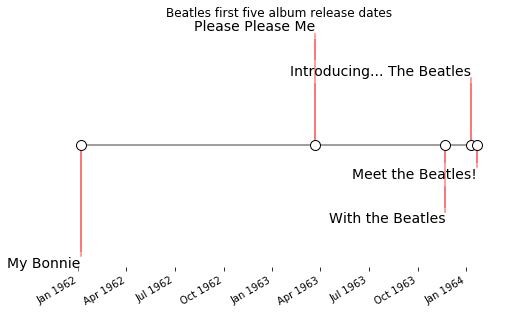

You will need to adjust the heights, font sizes, etc., to make it look clean.

Note that there is not direct function for plotting a module, you will just need to iterate over the values to create several overlaid plots with desired effects.

#### Points breakup:
This problem is worth 50 points, and first two subparts are worth 20 points each. For the plotting subpart, a clean looking plot with all information will fetch you 10 points. A cluttered plot, with all information, will only fetch you 5 points.

In [1]:
import requests
import re
def getPresidents(url):
    urlreq = requests.get(url)
    urltext = urlreq.text
    urllines = re.split(r'\n',urltext)
    presidents_wiki = []
    sub_url = "https://en.wikipedia.org"
    for line in urllines:
        match = re.search(r'.*\d{1,3}\s+years\sold.*|.*Lived:\s\d{1,3}\syears.*', line)
        if match:
            pwiki_url = re.findall(r'href="(/wiki/.*?)"',str(match.group(0)))
            if pwiki_url:
                completeurl = ""
                completeurl = sub_url+pwiki_url[0]
                if completeurl not in presidents_wiki:
                    presidents_wiki.append(completeurl)
    return presidents_wiki

In [2]:
import requests
import re
def getBirthdays(urls):
    birthdays = []
    names = []
    for url in urls:
        urlreq = requests.get(url)
        urltext = urlreq.text
        urllines = re.split(r'\n',urltext)

        gotname = False
        gotbirthdate = False
        for line in urllines:
            namematch = re.findall(r'<title>(\w*\s+\w*.*?)-\s+Wikipedia</title>' ,line)
            if namematch and not gotname:
                names.append(str(namematch[0]))
                gotname = True

            birthmatch = re.search(r'.*Personal\sdetails.*', line)
            if birthmatch and not gotbirthdate:
                pbirthday = re.findall(r'span>(\w*\s\d+,\s\d{4})' , str(birthmatch.group(0)))
                date = datetime.strptime(str(pbirthday[0]), "%B %d, %Y")
                birthdays.append(date)
                gotbirthdate = True
            if gotname and gotbirthdate:
                break
    nameBirth = pd.Series(names, index=birthdays)
    return nameBirth

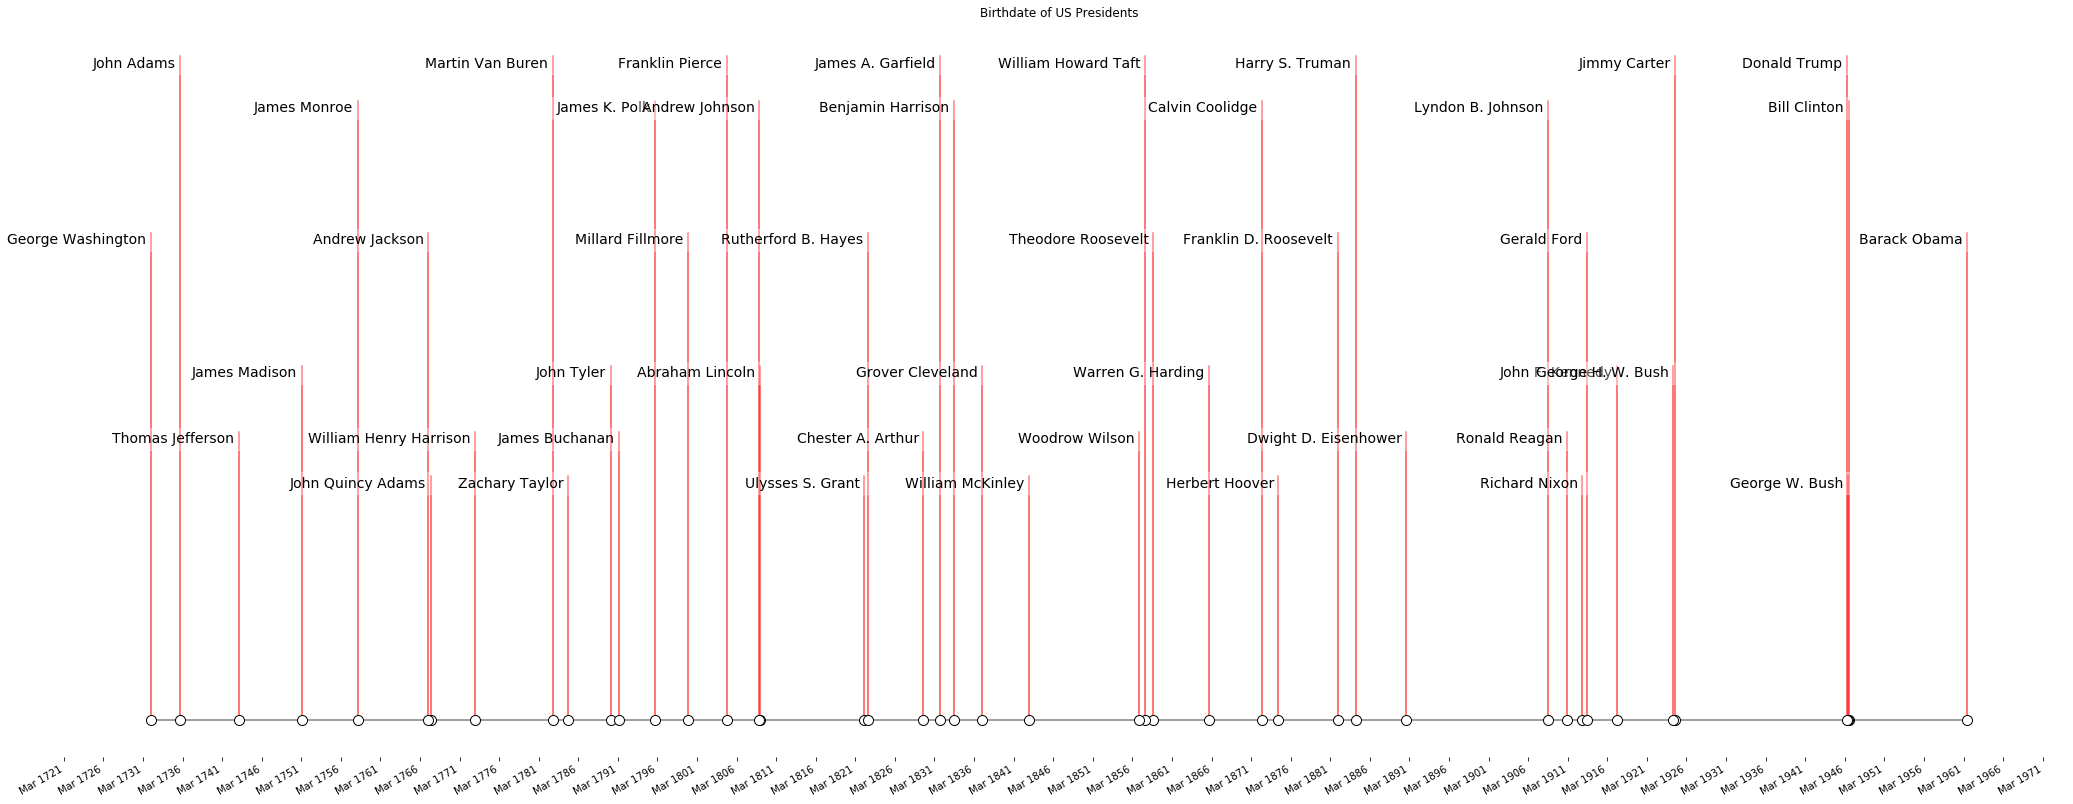

In [4]:
### add plotting code here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

presidentlist = getPresidents("https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States")
nameBirthSeries = getBirthdays(presidentlist)

levels = np.array(nameBirthSeries.keys().day)
fig, ax = plt.subplots(figsize=(36, 20))

# Create the base line
start = min(nameBirthSeries.keys())
stop = max(nameBirthSeries.keys())
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(nameBirthSeries.get_values(), nameBirthSeries.keys())):
    level = levels[ii % 6]
    vert = 'top'
    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Birthdate of US Presidents")
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=60))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

plt.setp((ax.get_yticklabels() + ax.get_yticklines() + list(ax.spines.values())), visible=False)
plt.show()

### Problem 2 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v3.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))

_Installation Notes_: You will need the `basemap` package. You can get that using:
```script
conda install basemap
```

Due to some bug in the way `conda` maintains environmental variables, the following import statement might not work:
```python
from mpl_toolkits.basemap import Basemap
```

If it does not work on your computer, try the following:
```python
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
```

No handles with labels found to put in legend.


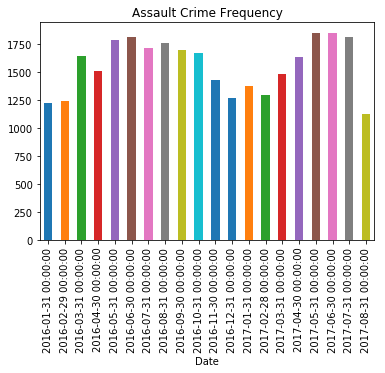

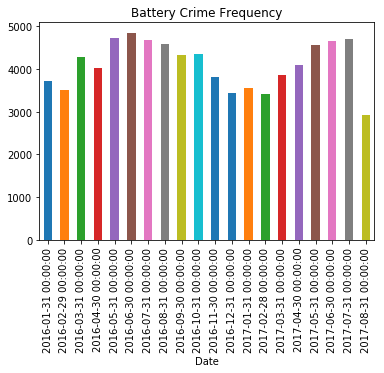

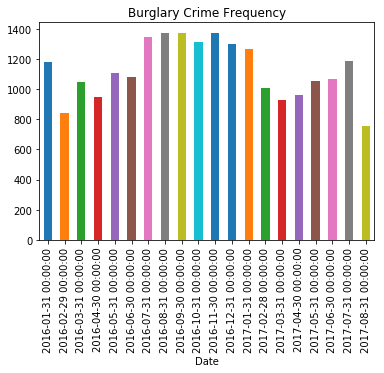

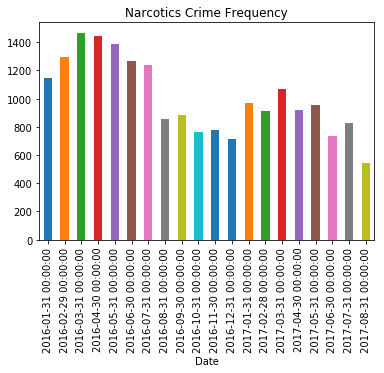

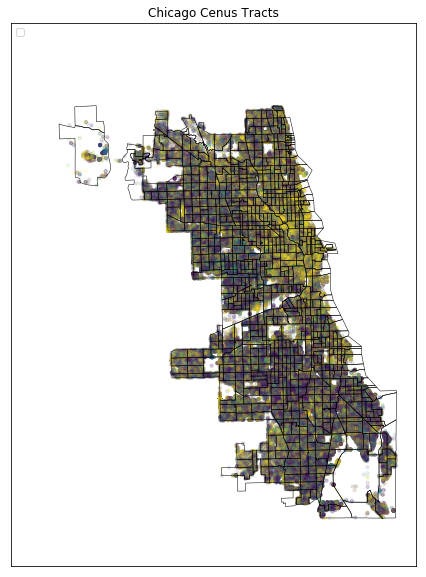

In [11]:
import pandas as pd
import os,conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

crime = pd.read_csv("chicago_crime_data_v3.csv")
crime = crime.sort_values(by = ['Cime_ID'])
primary_type = pd.read_csv("primary_type_ID.csv")
merged_data = crime.merge(primary_type, on='Primary Type ID')
###
aa = merged_data['Primary Type ID'].value_counts().sort_index()
df = pd.DataFrame()
df['Primary Type ID'] = aa.keys()
df['HFC Count'] = aa.get_values()
df['High Frequency Crime Types'] = np.where(df['HFC Count']>10000, 1, 0)
merged_data = merged_data.merge(df, on='Primary Type ID')

#merged_data
final_df = merged_data[merged_data["Primary Type ID"].isin(list(df[df["High Frequency Crime Types"]==1]["Primary Type ID"]))]
final_df = final_df[["Primary Type","Date"]]
final_df = final_df.set_index(["Date"])
final_df.index = pd.to_datetime(final_df.index,format='%m/%d/%Y %H:%M')
final_df = final_df.groupby("Primary Type").resample("M").count()

#PLOTS
final_df = pd.Series(final_df['Primary Type'])
plt.figure()
final_df.ASSAULT.plot(kind="bar")
plt.title("Assault Crime Frequency")
plt.figure()
final_df.BATTERY.plot(kind="bar")
plt.title("Battery Crime Frequency")
plt.figure()
final_df.BURGLARY.plot(kind="bar")
plt.title("Burglary Crime Frequency")
plt.figure()
final_df.NARCOTICS.plot(kind="bar")
plt.title("Narcotics Crime Frequency")
#Likewise we can plot for all other High Frequency Crime Types


#Basemap Plot
fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')

basemap_df = merged_data[merged_data["High Frequency Crime Types"]==1].iloc[:,np.r_[2,4,11,12]]
basemap_df = basemap_df.sort_values("Date").fillna(method='ffill').fillna(method='backfill')
lons = list(basemap_df["Longitude"])
lats = list(basemap_df["Latitude"])
x,y = m(lons,lats)
colors = list(basemap_df["Primary Type ID"])
plt.scatter(x,y,c=colors, alpha=0.1,s=10, legend=)
plt.legend(loc='upper left')
plt.title("Chicago Cenus Tracts")
plt.show()

### Problem 3 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

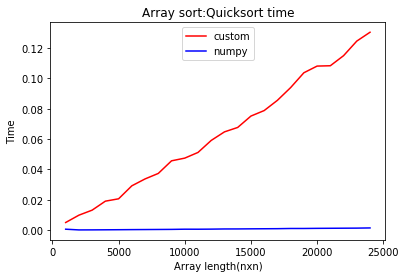

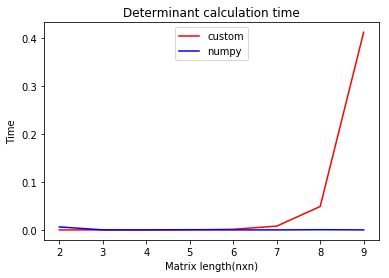

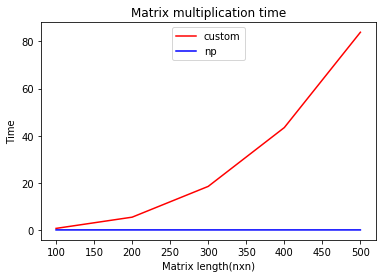

In [20]:
#Enter your solution here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#Measuring sorting performance
def partition(arr,low,high):
    i = ( low-1 ) # index of smaller element
    pivot = arr[high] # pivot

    for j in range(low , high):
        if arr[j] <= pivot:
            i = i+1
            arr[i],arr[j] = arr[j],arr[i]

    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 )

# Function to do Quick sort
def quickSort(arr,low,high):
    if low < high:
        pi = partition(arr,low,high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)


numpy_sort_time = []
custom_sort_time = []
array_size = []
for i in range(1000, 25000, 1000):
    array_size.append(i)
    B = np.random.randn(i)
    start = time.time()
    np.sort(B)
    end = time.time()
    numpy_sort_time.append(end-start)
    start = time.time()
    quickSort(B,0,len(B)-1)
    end = time.time()
    custom_sort_time.append(end-start)


plt.plot(array_size, custom_sort_time,'r', label="custom")
plt.plot(array_size, numpy_sort_time,'b', label="numpy")
plt.xlabel("Array length(nxn)")
plt.ylabel("Time")
plt.legend(loc="upper center")
plt.title("Array sort:Quicksort time")
plt.show()
    
#Measuring determinant calculation
def getMatrixMinor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def getMatrixDeternminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*getMatrixDeternminant(getMatrixMinor(m,0,c))
    return determinant


np_det_time = []
custom_det_time = []
array_size = []
# As this recusive method to calculate grows exponentially in time, we will just compare for Matrix sizes upto 10
for i in range(2,10,1):
    array_size.append(i)
    A = np.random.randn(i,i)
    start = time.time()
    np.linalg.det(A)
    end = time.time()
    np_det_time.append(end-start)
    start = time.time()
    getMatrixDeternminant(A.tolist())
    end = time.time()
    custom_det_time.append(end-start)

plt.plot(array_size, custom_det_time,'r', label="custom")
plt.plot(array_size, np_det_time,'b', label="numpy")
plt.xlabel("Matrix length(nxn)")
plt.ylabel("Time")
plt.legend(loc="upper center")
plt.title("Determinant calculation time")
plt.show()
    
#Measuring matrix multiplication 
def matrixMultiply(X,Y):
    result = np.zeros(X.shape).tolist()
    for i in range(len(X)):
       # iterate through columns of Y
       for j in range(len(Y[0])):
           # iterate through rows of Y
           for k in range(len(Y)):
               result[i][j] += X[i][k] * Y[k][j]
    return result
    
# Calculating and comparing matrix multiplication for square matrix sizes 100 to 500.
np_mul_time = []
custom_mul_time = []
array_size = []
for i in range(100,600, 100):
    array_size.append(i)
    A = np.random.randn(i,i)
    start = time.time()
    np.matmul(A,A)
    end = time.time()
    np_mul_time.append(end-start)
    start = time.time()
    matrixMultiply(A,A)
    end = time.time()
    custom_mul_time.append(end-start)


plt.plot(array_size, custom_mul_time,'r', label="custom")
plt.plot(array_size, np_mul_time,'b', label="np")
plt.xlabel("Matrix length(nxn)")
plt.ylabel("Time")
plt.legend(loc="upper center")
plt.title("Matrix multiplication time")
plt.show()

We can see from the Array sort plot that numpy sorting function is almost constant with time while my custom Quicksort function is linear with time. The time complexity of my Quicksort implementation is O(n*log(n)). 
This numpy feature of linear time complexity can be seen even for computing determinant and matrix multiplication. This is because numpy uses ndarray which is faster for homogeneous numeric calulations as against list in my case. Also numpy is implemented in C which is faster for machine interpretation. Other reason better numpy r